## Try to replicate Figure 3

Created by Basile Van Hoorick, Fall 2020.

In [1]:
%run FF_common.ipynb

In [2]:
# IMPORTANT: Henceforth, we use GD directly on inputs but use plasticity rules in the output and hidden layers.
opts_up = Options(gd_input=True,
                  use_graph_rule=True,
                  gd_graph_rule=True,
                  use_output_rule=True,
                  gd_output_rule=True,
                  gd_output=False)
opts_down = Options(gd_input=True,
                    use_graph_rule=True,
                    gd_graph_rule=False,  # Not meta-trainable anymore!
                    use_output_rule=True,
                    gd_output_rule=False,  # Not meta-trainable anymore!
                    gd_output=False)
if 0:
    scheme = UpdateScheme(cross_entropy_loss=True,
                          mse_loss=False,
                          update_misclassified_only=False,  # Deviates from paper.
                          update_all_edges=True)  # Deviates from paper.
else:
    # Same as paper.
    scheme = UpdateScheme(cross_entropy_loss=True,
                          mse_loss=False,
                          update_misclassified_only=True,
                          update_all_edges=False)

# Feed-forward brain config.
n_up = 16  # Unknown in paper.
n_down = 28 * 28
m_up = 2  # Unknown in paper.
m_down = 10
p = 0.5

# Training config.
num_runs = 5
num_rule_epochs = 50
num_epochs_upstream = 1
num_epochs_downstream = 1
downstream_backprop = False
dataset_up = 'halfspace'
dataset_down = 'mnist'  # T=3 deviates from paper, should be relu, but not enough parameters specified :/

## In this notebook: Transfer rules, correct dimensionality everywhere, !disable! backprop downstream

In [3]:
# Instantiate brain factories.
# NOTE: Large networks (|V| = 1000) only exist downstream.
brain_v100_t1_up_fact = lambda: LocalNet(n_up, m_up, 100, p, 50, 0, options=opts_up, update_scheme=scheme)
brain_v100_t3_up_fact = lambda: LocalNet(n_up, m_up, 100, p, 50, 2, options=opts_up, update_scheme=scheme)
brain_v100_t1_down_fact = lambda: LocalNet(n_down, m_down, 100, p, 50, 0, options=opts_down, update_scheme=scheme)
brain_v100_t3_down_fact = lambda: LocalNet(n_down, m_down, 100, p, 50, 2, options=opts_down, update_scheme=scheme)
brain_v1000_t1_down_fact = lambda: LocalNet(n_down, m_down, 1000, p, 500, 0, options=opts_down, update_scheme=scheme)
brain_v1000_t3_down_fact = lambda: LocalNet(n_down, m_down, 1000, p, 500, 2, options=opts_down, update_scheme=scheme)

In [ ]:
# Evaluate models.
print('=====> v100_t1')
stats_v100_t1_up, stats_v100_t1_down = evaluate_up_down(
    brain_v100_t1_up_fact, brain_v100_t1_down_fact,
    n_up, n_down, dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('=====> v100_t3')
stats_v100_t3_up, stats_v100_t3_down = evaluate_up_down(
    brain_v100_t3_up_fact, brain_v100_t3_down_fact,
    n_up, n_down, dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('=====> v1000_t1')
stats_v1000_t1_up, stats_v1000_t1_down = evaluate_up_down(
    brain_v100_t1_up_fact, brain_v1000_t1_down_fact,
    n_up, n_down, dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)
print('=====> v1000_t3')
stats_v1000_t3_up, stats_v1000_t3_down = evaluate_up_down(
    brain_v100_t3_up_fact, brain_v1000_t3_down_fact,
    n_up, n_down, dataset_up=dataset_up, dataset_down=dataset_down,
    downstream_backprop=downstream_backprop, num_runs=num_runs, num_rule_epochs=num_rule_epochs,
    num_epochs_upstream=num_epochs_upstream, num_epochs_downstream=num_epochs_downstream)

  0%|          | 0/50 [00:00<?, ?it/s]

=====> v100_t1

Run 1 / 5...
Meta-learning on halfspace...


100%|██████████| 50/50 [00:53<00:00,  1.07s/it]
../LocalNetBase.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.rnn_rule = torch.tensor(rule).flatten().double()


Last loss: 0.6384
Last train accuracy: 0.8800
Last test accuracy: 0.8520
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0890
INITIAL test accuracy: 0.0875
Epoch 1 / 1 ...


  0%|          | 0/50 [00:00<?, ?it/s]


Last loss: 1.7077
Last train accuracy: 0.7224
Last test accuracy: 0.7256


Run 2 / 5...
Meta-learning on halfspace...


100%|██████████| 50/50 [00:59<00:00,  1.20s/it]


Last loss: 0.6168
Last train accuracy: 0.8740
Last test accuracy: 0.8960
mnist_train: 60000
mnist_test: 10000
Training NEW brain instance on mnist...
===> WARNING: Backprop is disabled, which means that all layers without rules will never change their weights!
===> This is NOT recommended by Basile!
INITIAL train accuracy: 0.0878
INITIAL test accuracy: 0.0872
Epoch 1 / 1 ...


  2%|▏         | 1095/60000 [00:05<07:37, 128.78it/s]

In [ ]:
# Aggregate stats.
agg_stats_v100_t1_up = convert_multi_stats_uncertainty(stats_v100_t1_up)
agg_stats_v100_t1_down = convert_multi_stats_uncertainty(stats_v100_t1_down)
agg_stats_v100_t3_up = convert_multi_stats_uncertainty(stats_v100_t3_up)
agg_stats_v100_t3_down = convert_multi_stats_uncertainty(stats_v100_t3_down)
agg_stats_v1000_t1_up = convert_multi_stats_uncertainty(stats_v1000_t1_up)
agg_stats_v1000_t1_down = convert_multi_stats_uncertainty(stats_v1000_t1_down)
agg_stats_v1000_t3_up = convert_multi_stats_uncertainty(stats_v1000_t3_up)
agg_stats_v1000_t3_down = convert_multi_stats_uncertainty(stats_v1000_t3_down)

Saving figure to: figs/rnn_mnist_cmp


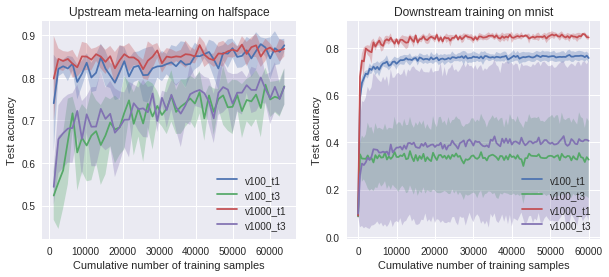

In [7]:
# Plot to compare all.
all_stats_up = [agg_stats_v100_t1_up, agg_stats_v100_t3_up, agg_stats_v1000_t1_up, agg_stats_v1000_t3_up]
all_stats_down = [agg_stats_v100_t1_down, agg_stats_v100_t3_down, agg_stats_v1000_t1_down, agg_stats_v1000_t3_down]
labels = ['v100_t1', 'v100_t3', 'v1000_t1', 'v1000_t3']
plot_compare_models(all_stats_up, all_stats_down, labels,
                    'Upstream meta-learning on ' + dataset_up,
                    'Downstream training on ' + dataset_down,
                    'figs/rnn_mnist_cmp')